In [1]:
# Import Modules
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
import seaborn as sns
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np
import sqlite3
import requests
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report
# Display all of the columns
pd.set_option('display.max_columns', None)

In [2]:
# Raw URL of the database file on GitHub
url = 'https://github.com/BFletchall/Project-4-Group-4-Machine-Learning/raw/main/claimed_time.db'
# Download the database file
r = requests.get(url)
with open('claimed_time.db', 'wb') as f:
    f.write(r.content)
# Connect to the SQLite database
conn = sqlite3.connect('claimed_time.db')
# Query data from the database table
query = "SELECT * FROM claimed_table"
# Read data into DataFrame
df = pd.read_sql(query, conn)
# Close the database connection
conn.close()
# Display the first few rows of the DataFrame
df.head()

,NumberWithDash,EPM_ProductionControlItemID,EPM_MainMark,EPM_InstanceNumber,Assembly_MainPieceProductionCode,Assembly_MainPartLengthFt,Assembly_WeightEachLbs,Assembly_SurfaceAreaEachSqFt,Assembly_MainPartShape,Assembly_MainPartDimension,Assembly_MainPartFinishDescr,Assembly_TotalQuantityInJob,Assembly_NumSmallParts,EPM_AdjustedStationName,TimeInSeconds_ThisWorkSegment,Assembly_EstTotalHours_ThisLaborGroup
0,19-048,870038,T124,1,S.S. TUBE STEEL,2.81,39.575,4.43,HSS,4 x 2 x 0.25,N - No Paint,1,1,Fab/Layout,142,0.0
1,19-048,870040,T125,1,S.S. TUBE STEEL,7.91,112.116,12.50,HSS,4 x 2 x 0.25,N - No Paint,2,1,Fab/Layout,124,0.0
2,19-048,870040,T125,1,S.S. TUBE STEEL,7.91,112.116,12.50,HSS,4 x 2 x 0.25,N - No Paint,2,1,Weld,47,0.0
3,19-048,870040,T125,2,S.S. TUBE STEEL,7.91,112.116,12.50,HSS,4 x 2 x 0.25,N - No Paint,2,1,Fab/Layout,124,0.0
4,19-048,870040,T125,2,S.S. TUBE STEEL,7.91,112.116,12.50,HSS,4 x 2 x 0.25,N - No Paint,2,1,Weld,48,0.0


In [4]:
df.columns

Index(['NumberWithDash', 'EPM_ProductionControlItemID', 'EPM_MainMark',
       'EPM_InstanceNumber', 'Assembly_MainPieceProductionCode',
       'Assembly_MainPartLengthFt', 'Assembly_WeightEachLbs',
       'Assembly_SurfaceAreaEachSqFt', 'Assembly_MainPartShape',
       'Assembly_MainPartDimension', 'Assembly_MainPartFinishDescr',
       'Assembly_TotalQuantityInJob', 'Assembly_NumSmallParts',
       'EPM_AdjustedStationName', 'TimeInSeconds_ThisWorkSegment',
       'Assembly_EstTotalHours_ThisLaborGroup'],
      dtype='object')

In [7]:
df_reduce = df.drop(columns=['EPM_MainMark', 'Assembly_EstTotalHours_ThisLaborGroup', 'NumberWithDash','Assembly_MainPartFinishDescr'], inplace=False)
df_reduce.head(30)

,EPM_ProductionControlItemID,EPM_InstanceNumber,Assembly_MainPieceProductionCode,Assembly_MainPartLengthFt,Assembly_WeightEachLbs,Assembly_SurfaceAreaEachSqFt,Assembly_MainPartShape,Assembly_MainPartDimension,Assembly_TotalQuantityInJob,Assembly_NumSmallParts,EPM_AdjustedStationName,TimeInSeconds_ThisWorkSegment
0,870038,1,S.S. TUBE STEEL,2.81,39.575,4.43,HSS,4 x 2 x 0.25,1,1,Fab/Layout,142
1,870040,1,S.S. TUBE STEEL,7.91,112.116,12.50,HSS,4 x 2 x 0.25,2,1,Fab/Layout,124
2,870040,1,S.S. TUBE STEEL,7.91,112.116,12.50,HSS,4 x 2 x 0.25,2,1,Weld,47
3,870040,2,S.S. TUBE STEEL,7.91,112.116,12.50,HSS,4 x 2 x 0.25,2,1,Fab/Layout,124
4,870040,2,S.S. TUBE STEEL,7.91,112.116,12.50,HSS,4 x 2 x 0.25,2,1,Weld,48
5,649474,16,S.S. PLATE,0.74,5.374,0.73,PL,3/8 x 7 7/8 §,20,0,Fab/Layout,12
6,649474,17,S.S. PLATE,0.74,5.374,0.73,PL,3/8 x 7 7/8 §,20,0,Fab/Layout,11
7,649474,18,S.S. PLATE,0.74,5.374,0.73,PL,3/8 x 7 7/8 §,20,0,Fab/Layout,12
8,649474,19,S.S. PLATE,0.74,5.374,0.73,PL,3/8 x 7 7/8 §,20,0,Fab/Layout,11
9,649474,20,S.S. PLATE,0.74,5.374,0.73,PL,3/8 x 7 7/8 §,20,0,Fab/Layout,12


In [8]:
df_reduce.columns

Index(['EPM_ProductionControlItemID', 'EPM_InstanceNumber',
       'Assembly_MainPieceProductionCode', 'Assembly_MainPartLengthFt',
       'Assembly_WeightEachLbs', 'Assembly_SurfaceAreaEachSqFt',
       'Assembly_MainPartShape', 'Assembly_MainPartDimension',
       'Assembly_TotalQuantityInJob', 'Assembly_NumSmallParts',
       'EPM_AdjustedStationName', 'TimeInSeconds_ThisWorkSegment'],
      dtype='object')

In [9]:
# Determine the number of unique values in each column.
unique_values = df_reduce.nunique()
print(unique_values)

EPM_ProductionControlItemID         2682
EPM_InstanceNumber                   851
Assembly_MainPieceProductionCode      62
Assembly_MainPartLengthFt           1161
Assembly_WeightEachLbs              2135
Assembly_SurfaceAreaEachSqFt        1944
Assembly_MainPartShape                19
Assembly_MainPartDimension           419
Assembly_TotalQuantityInJob           70
Assembly_NumSmallParts                92
EPM_AdjustedStationName                8
TimeInSeconds_ThisWorkSegment       3323
dtype: int64


In [10]:
# Look at APPLICATION_TYPE value counts for binning
job_type_counts = df_reduce['Assembly_MainPieceProductionCode'].value_counts()
print(job_type_counts)

Assembly_MainPieceProductionCode
BEAM           2821
SHIM STACK     1117
COLUMN         1022
ANGLE           888
BENT PLATE      727
               ... 
V-BRACE           2
INFILL            2
DOOR PLATE        2
TRUSS CHORD       1
SHIM PLATE        1
Name: count, Length: 62, dtype: int64


In [11]:
# Choose a cutoff value and create a list of job types to be replaced
# use the variable name `job_types_to_replace`
cutoff_value = 50

job_types_to_replace = [app for app, count in job_type_counts.items() if count < cutoff_value]

# Replace in dataframe
for app in job_types_to_replace:
    df_reduce['Assembly_MainPieceProductionCode'] =  df_reduce['Assembly_MainPieceProductionCode'].replace(app,"Other")

# Check to make sure binning was successful
df_reduce['Assembly_MainPieceProductionCode'].value_counts()

Assembly_MainPieceProductionCode
BEAM             2821
SHIM STACK       1117
COLUMN           1022
ANGLE             888
BENT PLATE        727
PLATE             650
Other             626
TUBE STEEL        544
CHANNEL           507
PLATE WASHER      398
RAIL              356
BOLLARD           256
ALUM ANGLE        224
SHIM              184
ALUM PLATE        180
Backer Bar        154
EMBED             122
ALUM CHANNEL      101
ALUM STRINGER      93
FRAME              75
STRINGER           71
S.S. ANGLE         62
EMBED PLATE        54
Name: count, dtype: int64

In [12]:
# Convert categorical data to numeric with `pd.get_dummies`
df_reduce_encoded = pd.get_dummies(df_reduce)
df_reduce_encoded.columns

Index(['EPM_ProductionControlItemID', 'EPM_InstanceNumber',
       'Assembly_MainPartLengthFt', 'Assembly_WeightEachLbs',
       'Assembly_SurfaceAreaEachSqFt', 'Assembly_TotalQuantityInJob',
       'Assembly_NumSmallParts', 'TimeInSeconds_ThisWorkSegment',
       'Assembly_MainPieceProductionCode_ALUM ANGLE',
       'Assembly_MainPieceProductionCode_ALUM CHANNEL',
       ...
       'Assembly_MainPartDimension_9 x 9 x 0.313',
       'Assembly_MainPartDimension_9 x 9 x 0.625',
       'EPM_AdjustedStationName_Beam Cambering', 'EPM_AdjustedStationName_Cut',
       'EPM_AdjustedStationName_Fab After Galv',
       'EPM_AdjustedStationName_Fab/Layout',
       'EPM_AdjustedStationName_Material Handling',
       'EPM_AdjustedStationName_Paint',
       'EPM_AdjustedStationName_Peddi Assembler',
       'EPM_AdjustedStationName_Weld'],
      dtype='object', length=477)

In [13]:
X = df_reduce_encoded.copy()
X.drop(['TimeInSeconds_ThisWorkSegment'], axis=1, inplace=True)
X.head()

,EPM_ProductionControlItemID,EPM_InstanceNumber,Assembly_MainPartLengthFt,Assembly_WeightEachLbs,Assembly_SurfaceAreaEachSqFt,Assembly_TotalQuantityInJob,Assembly_NumSmallParts,Assembly_MainPieceProductionCode_ALUM ANGLE,Assembly_MainPieceProductionCode_ALUM CHANNEL,Assembly_MainPieceProductionCode_ALUM PLATE,Assembly_MainPieceProductionCode_ALUM STRINGER,Assembly_MainPieceProductionCode_ANGLE,Assembly_MainPieceProductionCode_BEAM,Assembly_MainPieceProductionCode_BENT PLATE,Assembly_MainPieceProductionCode_BOLLARD,Assembly_MainPieceProductionCode_Backer Bar,Assembly_MainPieceProductionCode_CHANNEL,Assembly_MainPieceProductionCode_COLUMN,Assembly_MainPieceProductionCode_EMBED,Assembly_MainPieceProductionCode_EMBED PLATE,Assembly_MainPieceProductionCode_FRAME,Assembly_MainPieceProductionCode_Other,Assembly_MainPieceProductionCode_PLATE,Assembly_MainPieceProductionCode_PLATE WASHER,Assembly_MainPieceProductionCode_RAIL,Assembly_MainPieceProductionCode_S.S. ANGLE,Assembly_MainPieceProductionCode_SHIM,Assembly_MainPieceProductionCode_SHIM STACK,Assembly_MainPieceProductionCode_STRINGER,Assembly_MainPieceProductionCode_TUBE STEEL,Assembly_MainPartShape_AC,Assembly_MainPartShape_AFB,Assembly_MainPartShape_AHSS,Assembly_MainPartShape_AL,Assembly_MainPartShape_ALB,Assembly_MainPartShape_API,Assembly_MainPartShape_C,Assembly_MainPartShape_CHKD_PLT,Assembly_MainPartShape_FB,Assembly_MainPartShape_HP,Assembly_MainPartShape_HSS,Assembly_MainPartShape_HSSR,Assembly_MainPartShape_L,Assembly_MainPartShape_MC,Assembly_MainPartShape_PI,Assembly_MainPartShape_PL,Assembly_MainPartShape_S,Assembly_MainPartShape_W,Assembly_MainPartShape_WT,Assembly_MainPartDimension_1 1/2 x 1 1/2 x 1/4,Assembly_MainPartDimension_1 1/2SCH40,Assembly_MainPartDimension_1 1/2SCH80,Assembly_MainPartDimension_1 1/4SCH40,Assembly_MainPartDimension_1 1/4SCH80,Assembly_MainPartDimension_1 3/4 x 1 3/4 x 1/4,Assembly_MainPartDimension_1 x 12 5/8 §,Assembly_MainPartDimension_1 x 15 1/2,Assembly_MainPartDimension_1 x 15 5/16,Assembly_MainPartDimension_1 x 17 11/16,Assembly_MainPartDimension_1 x 4 1/2,Assembly_MainPartDimension_1/2 x 10,Assembly_MainPartDimension_1/2 x 12,Assembly_MainPartDimension_1/2 x 15,Assembly_MainPartDimension_1/2 x 2,Assembly_MainPartDimension_1/2 x 22,Assembly_MainPartDimension_1/2 x 29 §,Assembly_MainPartDimension_1/2 x 3,Assembly_MainPartDimension_1/2 x 3 1/2,Assembly_MainPartDimension_1/2 x 3 15/16 §,Assembly_MainPartDimension_1/2 x 32,Assembly_MainPartDimension_1/2 x 36,Assembly_MainPartDimension_1/2 x 4,Assembly_MainPartDimension_1/2 x 4 1/2,Assembly_MainPartDimension_1/2 x 4 13/16 §,Assembly_MainPartDimension_1/2 x 5,Assembly_MainPartDimension_1/2 x 5 15/16 §,Assembly_MainPartDimension_1/2 x 6,Assembly_MainPartDimension_1/2 x 60,Assembly_MainPartDimension_1/2 x 7,Assembly_MainPartDimension_1/2 x 8,Assembly_MainPartDimension_1/2 x 8 1/2 §,Assembly_MainPartDimension_1/4 x 1,Assembly_MainPartDimension_1/4 x 1 1/4,Assembly_MainPartDimension_1/4 x 1 3/4 §,Assembly_MainPartDimension_1/4 x 10 1/2,Assembly_MainPartDimension_1/4 x 10 1/2 §,Assembly_MainPartDimension_1/4 x 10 1/4,Assembly_MainPartDimension_1/4 x 104 §,Assembly_MainPartDimension_1/4 x 11,Assembly_MainPartDimension_1/4 x 11 3/4 §,Assembly_MainPartDimension_1/4 x 11 3/8 §,Assembly_MainPartDimension_1/4 x 11 7/8 §,Assembly_MainPartDimension_1/4 x 12,Assembly_MainPartDimension_1/4 x 12 §,Assembly_MainPartDimension_1/4 x 13 1/16,Assembly_MainPartDimension_1/4 x 13 1/2,Assembly_MainPartDimension_1/4 x 13 1/2 §,Assembly_MainPartDimension_1/4 x 13 13/16 §,Assembly_MainPartDimension_1/4 x 14,Assembly_MainPartDimension_1/4 x 14 §,Assembly_MainPartDimension_1/4 x 15 1/8 §,Assembly_MainPartDimension_1/4 x 16,Assembly_MainPartDimension_1/4 x 16 1/4 §,Assembly_MainPartDimension_1/4 x 16 7/16 §,Assembly_MainPartDimension_1/4 x 17 3/8,Assembly_MainPartDimension_1/4 x 17 3/8 §,Assembly_MainPartDimension_1/4 x 18,Assembly_MainPartDimension_1/4 x 18 1/2,Assembly_MainPartDimension_1/4 x 18 1/2 §,Assembly_MainPa

In [14]:
y = df_reduce_encoded['TimeInSeconds_ThisWorkSegment'].ravel()
y[:5]

array([142, 124,  47, 124,  48], dtype=int64)

In [15]:
# Preview the data
print("Features Shape:",X.shape)
print("Targe Shape:", y.shape)

Features Shape: (11232, 476)
Targe Shape: (11232,)


In [16]:
df_reduce_encoded.columns

Index(['EPM_ProductionControlItemID', 'EPM_InstanceNumber',
       'Assembly_MainPartLengthFt', 'Assembly_WeightEachLbs',
       'Assembly_SurfaceAreaEachSqFt', 'Assembly_TotalQuantityInJob',
       'Assembly_NumSmallParts', 'TimeInSeconds_ThisWorkSegment',
       'Assembly_MainPieceProductionCode_ALUM ANGLE',
       'Assembly_MainPieceProductionCode_ALUM CHANNEL',
       ...
       'Assembly_MainPartDimension_9 x 9 x 0.313',
       'Assembly_MainPartDimension_9 x 9 x 0.625',
       'EPM_AdjustedStationName_Beam Cambering', 'EPM_AdjustedStationName_Cut',
       'EPM_AdjustedStationName_Fab After Galv',
       'EPM_AdjustedStationName_Fab/Layout',
       'EPM_AdjustedStationName_Material Handling',
       'EPM_AdjustedStationName_Paint',
       'EPM_AdjustedStationName_Peddi Assembler',
       'EPM_AdjustedStationName_Weld'],
      dtype='object', length=477)

In [17]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [18]:
# Creating StandardScaler instance
scaler = StandardScaler()

In [19]:
# Fitting Standard Scaler
X_scaler = scaler.fit(X_train)

In [20]:
X_scaler

StandardScaler()

In [21]:
# Scaling data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [22]:
X_test_scaled

array([[-0.07913914, -0.34639258, -0.58628525, ..., -0.10391889,
        -0.17124694, -0.49279255],
       [-0.07983303, -0.34639258, -0.5099581 , ..., -0.10391889,
        -0.17124694, -0.49279255],
       [-0.55032938, -0.3350299 , -0.94677011, ..., -0.10391889,
        -0.17124694, -0.49279255],
       ...,
       [ 1.26441849, -0.34260502, -0.81618631, ..., -0.10391889,
        -0.17124694, -0.49279255],
       [ 1.25446816, -0.33881746, -0.60191852, ..., -0.10391889,
        -0.17124694, -0.49279255],
       [ 1.22921071, -0.34260502, -0.52375216, ..., -0.10391889,
        -0.17124694, -0.49279255]])

# Fitting the Random Forest Model

In [23]:
# Instantiate the Random Forest Regression model
rf_reg = RandomForestRegressor(n_estimators=100)

In [24]:
# Fit the model to the training data
rf_reg.fit(X_train_scaled, y_train)

RandomForestRegressor()

In [25]:
# Predict the target values for the test set
y_pred_rf = rf_reg.predict(X_test_scaled)

In [26]:
# Evaluate the model
print("Random Forest Regression Model Score (R^2):", rf_reg.score(X_test_scaled, y_test))
print("Random Forest Regression Mean Absolute Error:", np.mean(np.abs(y_pred_rf - y_test)))

Random Forest Regression Model Score (R^2): -0.002062539338593572
Random Forest Regression Mean Absolute Error: 1465.5668544634377


In [27]:
# Display feature importances
feature_importances = rf_reg.feature_importances_
print("Feature Importances:")
for i, feature in enumerate(X.columns):
    print(f"{feature}: {feature_importances[i]}")

Feature Importances:
EPM_ProductionControlItemID: 0.057531721263583954
EPM_InstanceNumber: 0.012871530566389231
Assembly_MainPartLengthFt: 0.033665740735034304
Assembly_WeightEachLbs: 0.08599778982207965
Assembly_SurfaceAreaEachSqFt: 0.36698819922430603
Assembly_TotalQuantityInJob: 0.0029029462967050724
Assembly_NumSmallParts: 0.11156610943259887
Assembly_MainPieceProductionCode_ALUM ANGLE: 4.035935652003911e-06
Assembly_MainPieceProductionCode_ALUM CHANNEL: 4.639940727727685e-05
Assembly_MainPieceProductionCode_ALUM PLATE: 4.614336588631473e-05
Assembly_MainPieceProductionCode_ALUM STRINGER: 2.714365853135825e-06
Assembly_MainPieceProductionCode_ANGLE: 3.2175869324747314e-06
Assembly_MainPieceProductionCode_BEAM: 0.0014144131418103423
Assembly_MainPieceProductionCode_BENT PLATE: 1.2149933809821942e-05
Assembly_MainPieceProductionCode_BOLLARD: 4.4654641946124366e-07
Assembly_MainPieceProductionCode_Backer Bar: 4.373849181329463e-10
Assembly_MainPieceProductionCode_CHANNEL: 5.0975477080

<Figure size 1000x600 with 0 Axes>

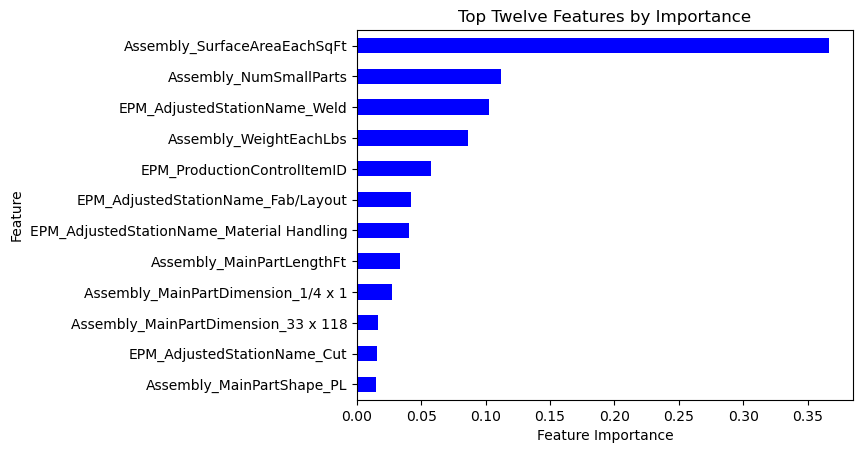

In [33]:
# Visualize features by importance
plt.figure(figsize=(10, 6))
feature_importance_df = pd.DataFrame(sorted(zip(rf_reg.feature_importances_, X.columns), reverse=True))
feature_importance_df.set_index(feature_importance_df[1], inplace=True)
feature_importance_df.drop(columns=1, inplace=True)
feature_importance_df.rename(columns={0:'Feature Importances'}, inplace=True)
feature_importance_sorted = feature_importance_df.sort_values(by='Feature Importances')
top_ten_features = feature_importance_sorted.tail(12)  # Selecting the top ten features
top_ten_features.plot(kind='barh', color='blue', title='Top Twelve Features by Importance', legend=False)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

# Predict and Plot

In [28]:
# Predict the target values for the test set
y_pred_rf = rf_reg.predict(X_test_scaled)
# Create a DataFrame to store actual and predicted values
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_rf}, index=X_test.index)
# Add columns from X_test to add feature detail
predictions = pd.concat([predictions, X_test], axis=1)
# Add another column
predictions['Difference'] = predictions['Actual'] - predictions['Predicted']

predictions.to_csv('predictions.csv', index=False)
predictions.head(15)

,Actual,Predicted,EPM_ProductionControlItemID,EPM_InstanceNumber,Assembly_MainPartLengthFt,Assembly_WeightEachLbs,Assembly_SurfaceAreaEachSqFt,Assembly_TotalQuantityInJob,Assembly_NumSmallParts,Assembly_MainPieceProductionCode_ALUM ANGLE,Assembly_MainPieceProductionCode_ALUM CHANNEL,Assembly_MainPieceProductionCode_ALUM PLATE,Assembly_MainPieceProductionCode_ALUM STRINGER,Assembly_MainPieceProductionCode_ANGLE,Assembly_MainPieceProductionCode_BEAM,Assembly_MainPieceProductionCode_BENT PLATE,Assembly_MainPieceProductionCode_BOLLARD,Assembly_MainPieceProductionCode_Backer Bar,Assembly_MainPieceProductionCode_CHANNEL,Assembly_MainPieceProductionCode_COLUMN,Assembly_MainPieceProductionCode_EMBED,Assembly_MainPieceProductionCode_EMBED PLATE,Assembly_MainPieceProductionCode_FRAME,Assembly_MainPieceProductionCode_Other,Assembly_MainPieceProductionCode_PLATE,Assembly_MainPieceProductionCode_PLATE WASHER,Assembly_MainPieceProductionCode_RAIL,Assembly_MainPieceProductionCode_S.S. ANGLE,Assembly_MainPieceProductionCode_SHIM,Assembly_MainPieceProductionCode_SHIM STACK,Assembly_MainPieceProductionCode_STRINGER,Assembly_MainPieceProductionCode_TUBE STEEL,Assembly_MainPartShape_AC,Assembly_MainPartShape_AFB,Assembly_MainPartShape_AHSS,Assembly_MainPartShape_AL,Assembly_MainPartShape_ALB,Assembly_MainPartShape_API,Assembly_MainPartShape_C,Assembly_MainPartShape_CHKD_PLT,Assembly_MainPartShape_FB,Assembly_MainPartShape_HP,Assembly_MainPartShape_HSS,Assembly_MainPartShape_HSSR,Assembly_MainPartShape_L,Assembly_MainPartShape_MC,Assembly_MainPartShape_PI,Assembly_MainPartShape_PL,Assembly_MainPartShape_S,Assembly_MainPartShape_W,Assembly_MainPartShape_WT,Assembly_MainPartDimension_1 1/2 x 1 1/2 x 1/4,Assembly_MainPartDimension_1 1/2SCH40,Assembly_MainPartDimension_1 1/2SCH80,Assembly_MainPartDimension_1 1/4SCH40,Assembly_MainPartDimension_1 1/4SCH80,Assembly_MainPartDimension_1 3/4 x 1 3/4 x 1/4,Assembly_MainPartDimension_1 x 12 5/8 §,Assembly_MainPartDimension_1 x 15 1/2,Assembly_MainPartDimension_1 x 15 5/16,Assembly_MainPartDimension_1 x 17 11/16,Assembly_MainPartDimension_1 x 4 1/2,Assembly_MainPartDimension_1/2 x 10,Assembly_MainPartDimension_1/2 x 12,Assembly_MainPartDimension_1/2 x 15,Assembly_MainPartDimension_1/2 x 2,Assembly_MainPartDimension_1/2 x 22,Assembly_MainPartDimension_1/2 x 29 §,Assembly_MainPartDimension_1/2 x 3,Assembly_MainPartDimension_1/2 x 3 1/2,Assembly_MainPartDimension_1/2 x 3 15/16 §,Assembly_MainPartDimension_1/2 x 32,Assembly_MainPartDimension_1/2 x 36,Assembly_MainPartDimension_1/2 x 4,Assembly_MainPartDimension_1/2 x 4 1/2,Assembly_MainPartDimension_1/2 x 4 13/16 §,Assembly_MainPartDimension_1/2 x 5,Assembly_MainPartDimension_1/2 x 5 15/16 §,Assembly_MainPartDimension_1/2 x 6,Assembly_MainPartDimension_1/2 x 60,Assembly_MainPartDimension_1/2 x 7,Assembly_MainPartDimension_1/2 x 8,Assembly_MainPartDimension_1/2 x 8 1/2 §,Assembly_MainPartDimension_1/4 x 1,Assembly_MainPartDimension_1/4 x 1 1/4,Assembly_MainPartDimension_1/4 x 1 3/4 §,Assembly_MainPartDimension_1/4 x 10 1/2,Assembly_MainPartDimension_1/4 x 10 1/2 §,Assembly_MainPartDimension_1/4 x 10 1/4,Assembly_MainPartDimension_1/4 x 104 §,Assembly_MainPartDimension_1/4 x 11,Assembly_MainPartDimension_1/4 x 11 3/4 §,Assembly_MainPartDimension_1/4 x 11 3/8 §,Assembly_MainPartDimension_1/4 x 11 7/8 §,Assembly_MainPartDimension_1/4 x 12,Assembly_MainPartDimension_1/4 x 12 §,Assembly_MainPartDimension_1/4 x 13 1/16,Assembly_MainPartDimension_1/4 x 13 1/2,Assembly_MainPartDimension_1/4 x 13 1/2 §,Assembly_MainPartDimension_1/4 x 13 13/16 §,Assembly_MainPartDimension_1/4 x 14,Assembly_MainPartDimension_1/4 x 14 §,Assembly_MainPartDimension_1/4 x 15 1/8 §,Assembly_MainPartDimension_1/4 x 16,Assembly_MainPartDimension_1/4 x 16 1/4 §,Assembly_MainPartDimension_1/4 x 16 7/16 §,Assembly_MainPartDimension_1/4 x 17 3/8,Assembly_MainPartDimension_1/4 x 17 3/8 §,Assembly_MainPartDimension_1/4 x 18,Assembly_MainPartDimension_1/4 x 18 1/2,Assembly_MainPartDimension_1/4 x 18 1/2 

In [42]:
from sklearn.metrics import r2_score, mean_absolute_error

# Calculate R-squared score
r2 = r2_score(y_test, y_pred_rf)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred_rf)

print("Random Forest Regression Model Score (R^2):", r2)
print("Random Forest Regression Mean Absolute Error:", mae)

Random Forest Regression Model Score (R^2): -0.002062539338593572
Random Forest Regression Mean Absolute Error: 1465.5668544634377


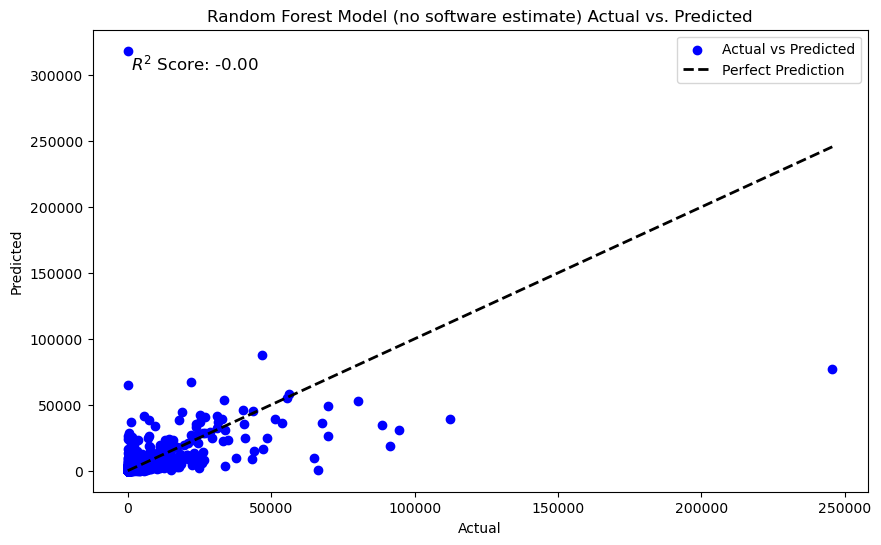

In [47]:
# Plot actual vs. predicted values

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, color='blue', label='Actual vs Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Perfect Prediction')
plt.text(0.05, 0.95, '$R^2$ Score: {:.2f}'.format(r2), transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Random Forest Model (no software estimate) Actual vs. Predicted')
plt.savefig('RDM_actual_vs_predicted.png', dpi=300, bbox_inches='tight')  # Saving plot to PNG file
plt.legend()
plt.show()

In [30]:
# Predict the target values for the test set
y_pred_rf = rf_reg.predict(X_test_scaled)

# Create a DataFrame to store actual and predicted values
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_rf})
predictions.head()

,Actual,Predicted
0,1683,925.02
1,52,59.30
2,8,4.70
3,2,4.68
4,3,26.28


In [32]:
#Export Predictions to csv to use for analysis
predictions.to_csv('../analysis/predictions.csv', index=False)